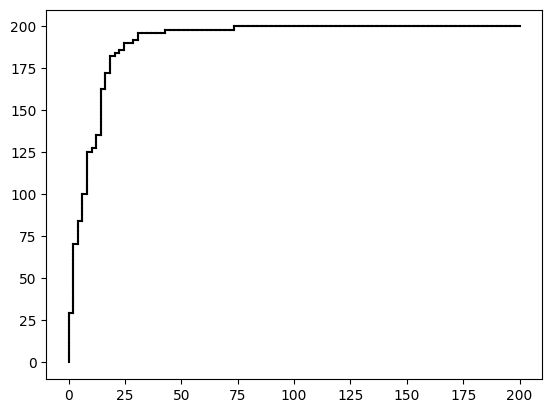

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

def draw_rocauc(proba, y_test, length):
    arr = np.r_[[proba], [y_test]]
    arr = arr[:, (-arr)[0].argsort()]

    n1 = y_test[y_test==1].sum()
    n0 = len(y_test) - n1

    s0 = length/n0
    s1 = length/n1

    x0 = 0
    y0 = 0

    y = arr[1, :]
    p = arr[0, :]

    for i in range(0,len(y)):
        k0 = 0
        k1 = 0
        if y[i] == 1:
            k1 = 1
        else:
            k0 = 1
        while  i < len(y_test) - 1 and p[i + 1]== p[i]:
            if y_test[i+1] == 1:
                k1 += 1
            else:
                k0 += 1
            i += 1
        x1 = x0 + k0*s0
        y1 = y0 + k1*s1    
        plt.plot([x0, x1], [y0, y1], color='black')  
        x0 = x1
        y0 = y1  
    plt.show()

X, y = make_classification(n_samples = 1000, n_features = 2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
lr = LogisticRegression()
lr.fit(X, y)
p = lr.predict_proba(X_test)[:,1]
draw_rocauc(p, y_test, length=200)